## SVM
Given cancer dataset create SVM model with label having the patient  benign or malignant tumour using the below techniques.



In [91]:
#Importing necessary libraries
import pandas as pd
import numpy as np

In [92]:
#Loading DataSet
df = pd.read_csv('cancer.csv')


In [93]:
    df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [94]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [95]:
df.diagnosis.replace(['B','M'],[int(0), int(1)] , inplace=True)

In [69]:
#Check whether teh data is a balanced dataset or not
df.diagnosis.value_counts()


0    357
1    212
Name: diagnosis, dtype: int64

In [96]:
#Seperate data as features and label
features = df.iloc[:,2:33].values
label = df.diagnosis.values
features

array([[1.232e+01, 1.239e+01, 7.885e+01, ..., 9.391e-02, 2.827e-01,
        6.771e-02],
       [1.060e+01, 1.895e+01, 6.928e+01, ..., 7.926e-02, 2.940e-01,
        7.587e-02],
       [1.104e+01, 1.683e+01, 7.092e+01, ..., 7.431e-02, 2.998e-01,
        7.881e-02],
       ...,
       [1.528e+01, 2.241e+01, 9.892e+01, ..., 1.226e-01, 3.175e-01,
        9.772e-02],
       [1.453e+01, 1.398e+01, 9.386e+01, ..., 1.069e-01, 2.606e-01,
        7.810e-02],
       [2.137e+01, 1.510e+01, 1.413e+02, ..., 1.966e-01, 2.730e-01,
        8.666e-02]])

In [97]:
import warnings
warnings.filterwarnings('ignore')

In [98]:
#Commenting out the below code so that execution happens faster

from sklearn.model_selection import train_test_split

#KNN with Bagging Classifier
'''
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

def determine_RS_and_ES(features,label):
    max_ts = 0
    max_es = 0
    max_rs = 0
    model = None
    for i in range(1,51):
        X_train,X_test,y_train,y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.2,
                                                    random_state=i)
        for j in range(1,51):
            algorithm = KNeighborsClassifier()
            model = BaggingClassifier(n_estimators=j,
                             base_estimator=algorithm)
            model.fit(X_train,y_train)

            train_s=model.score(X_train,y_train)
            test_s=model.score(X_test,y_test)

            if test_s > train_s:
                #print("Test Score {} Train Score {} RS {}".format(test_s,train_s,i))
                if test_s > max_ts:
                    max_ts = test_s
                    max_rs = i
                    max_es = j
                    model = model
        print ("test score for RS  %r " % max_ts)
    return max_ts, max_rs, max_es, X_train,X_test,y_train,y_test , model

max_ts, max_rs , max_es, X_train,X_test,y_train,y_test, model   = determine_RS_and_ES(features,label)

print ("Random state %r Estimators %r  corresponding to max test score %r   " %(max_rs,max_es, max_ts))
'''

'\nfrom sklearn.ensemble import BaggingClassifier\nfrom sklearn.neighbors import KNeighborsClassifier\n\ndef determine_RS_and_ES(features,label):\n    max_ts = 0\n    max_es = 0\n    max_rs = 0\n    model = None\n    for i in range(1,51):\n        X_train,X_test,y_train,y_test = train_test_split(features,\n                                                    label,\n                                                    test_size=0.2,\n                                                    random_state=i)\n        for j in range(1,51):\n            algorithm = KNeighborsClassifier()\n            model = BaggingClassifier(n_estimators=j,\n                             base_estimator=algorithm)\n            model.fit(X_train,y_train)\n\n            train_s=model.score(X_train,y_train)\n            test_s=model.score(X_test,y_test)\n\n            if test_s > train_s:\n                #print("Test Score {} Train Score {} RS {}".format(test_s,train_s,i))\n                if test_s > max_ts:\n      

In [99]:

#Random state 44 Estimators 1  corresponding to max test score 0.914047619047619   

In [100]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=44)

In [101]:
#KNN with Bagging Regressor

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

algorithm = KNeighborsClassifier()

model = BaggingClassifier(n_estimators=13,
                         base_estimator=algorithm)

model.fit(X_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=13, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [102]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9384615384615385
0.9473684210526315


### Perform feature scaling

In [103]:

import seaborn as sns
%matplotlib inline

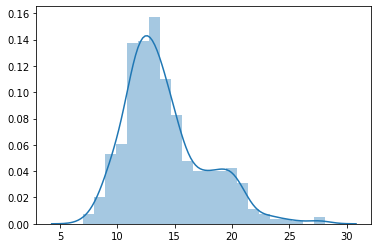

In [104]:
sns.distplot(features[:,[0]]) 

In [105]:
#Standardize the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ideal_features = sc.fit_transform(features)
label = df.diagnosis.values

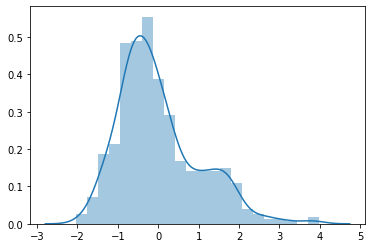

In [106]:
sns.distplot(ideal_features[:,[0]]) 

### SVM

In [163]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import SVR


def determine_RS(features,label ,kernel, overfitted = False):
    max_ts = 0
    hit = 0
    max_rs = 0
    model = None
    for i in range(1,51):

        X_train,X_test,y_train,y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.2,
                                                    random_state=i)
        
        
        if overfitted:
            algorithm = KNeighborsClassifier()
            model = BaggingClassifier(n_estimators=13,
                             base_estimator=algorithm)
        else:
            model = SVR(kernel) #linear regressor
            
        model.fit(X_train,y_train)

        train_s=model.score(X_train,y_train)
        test_s=model.score(X_test,y_test)

        if test_s > train_s:
            print("Test Score {} Train Score {} RS {}".format(test_s,train_s,i))
            if test_s > max_ts:
                hit = 1
                max_ts = test_s
                max_rs = i
                model = model
        
    if not hit:
        print ("Overfitted model")
    return max_ts, max_rs, hit 
max_ts, max_rs, hit  = determine_RS(ideal_features,label, 'linear')

print ("Random state %r corresponding to max test score for Linear model is %r   " %(max_rs, max_ts))


Test Score 0.7584625683985402 Train Score 0.7530073034863507 RS 6
Test Score 0.7624983268197094 Train Score 0.7560446838298842 RS 11
Test Score 0.7641483321151118 Train Score 0.7578895922829368 RS 22
Test Score 0.7897014343461236 Train Score 0.7446325665619853 RS 33
Test Score 0.7610173099790825 Train Score 0.7549918504214738 RS 35
Test Score 0.7570744058759029 Train Score 0.7538992932487409 RS 40
Test Score 0.7938334643849421 Train Score 0.7513239365895789 RS 43
Test Score 0.8072113412583289 Train Score 0.7515095324616111 RS 50
Random state 50 corresponding to max test score for Linear model is 0.8072113412583289   


In [164]:
def apply_RS(random_state, kernel):

    X_train,X_test,y_train,y_test = train_test_split(ideal_features,
                                                label,
                                                test_size=0.2,
                                                random_state=random_state)
    model = SVR(kernel) #linear regressor
    model.fit(X_train,y_train)

    train_s=model.score(X_train,y_train)
    test_s=model.score(X_test,y_test)
    print ("Train score  {} " .format(train_s))
    print ("Test score  {} " .format(test_s))
    


### SVM - Linear

In [165]:
max_ts, max_rs, hit  = determine_RS(ideal_features,label, 'linear')
print ("MAx rs %r " % max_rs)
if hit:
    apply_RS(max_rs, 'linear')
else:
    determine_RS(ideal_features,label, 'linear', overfitted)
    apply_RS(max_rs, 'linear')
    

Test Score 0.7584625683985402 Train Score 0.7530073034863507 RS 6
Test Score 0.7624983268197094 Train Score 0.7560446838298842 RS 11
Test Score 0.7641483321151118 Train Score 0.7578895922829368 RS 22
Test Score 0.7897014343461236 Train Score 0.7446325665619853 RS 33
Test Score 0.7610173099790825 Train Score 0.7549918504214738 RS 35
Test Score 0.7570744058759029 Train Score 0.7538992932487409 RS 40
Test Score 0.7938334643849421 Train Score 0.7513239365895789 RS 43
Test Score 0.8072113412583289 Train Score 0.7515095324616111 RS 50
MAx rs 50 
Train score  0.7515095324616111 
Test score  0.8072113412583289 


### SVM - RBF

In [166]:
max_ts, max_rs, hit  = determine_RS(ideal_features,label, 'rbf')
if hit:
    apply_RS(max_rs, 'rbf')
else:
    determine_RS(ideal_features,label, 'rbf', overfitted = True)
    apply_RS(max_rs, 'rbf')
#Conclusion : Its an overfitterd model


Overfitted model
Test Score 0.9824561403508771 Train Score 0.9714285714285714 RS 3
Test Score 0.9912280701754386 Train Score 0.967032967032967 RS 5
Test Score 0.9736842105263158 Train Score 0.9736263736263736 RS 13
Test Score 0.9824561403508771 Train Score 0.9758241758241758 RS 16
Test Score 0.9824561403508771 Train Score 0.9758241758241758 RS 17
Test Score 0.9824561403508771 Train Score 0.9714285714285714 RS 19
Test Score 0.9736842105263158 Train Score 0.9692307692307692 RS 25
Test Score 0.9736842105263158 Train Score 0.9736263736263736 RS 29
Test Score 0.9736842105263158 Train Score 0.9714285714285714 RS 32
Test Score 0.9824561403508771 Train Score 0.9758241758241758 RS 33
Test Score 0.9824561403508771 Train Score 0.9736263736263736 RS 42
Test Score 0.9824561403508771 Train Score 0.9714285714285714 RS 43
Test Score 0.9824561403508771 Train Score 0.9758241758241758 RS 44
Test Score 0.9912280701754386 Train Score 0.9626373626373627 RS 47
Test Score 0.9736842105263158 Train Score 0.9714

### SVM - Poly

In [167]:
label = df.diagnosis.values
max_ts, max_rs ,hit = determine_RS(ideal_features,label, 'poly')
if hit:
    apply_RS(max_rs, 'poly')
else:
    determine_RS(ideal_features,label, 'poly', overfitted = True)
    #apply_RS(max_rs, 'poly')

Overfitted model
Test Score 0.9736842105263158 Train Score 0.9714285714285714 RS 3
Test Score 0.9912280701754386 Train Score 0.9648351648351648 RS 5
Test Score 0.9824561403508771 Train Score 0.978021978021978 RS 11
Test Score 0.9736842105263158 Train Score 0.9736263736263736 RS 12
Test Score 0.9824561403508771 Train Score 0.978021978021978 RS 16
Test Score 0.9736842105263158 Train Score 0.9736263736263736 RS 17
Test Score 0.9824561403508771 Train Score 0.9758241758241758 RS 21
Test Score 0.9736842105263158 Train Score 0.9648351648351648 RS 22
Test Score 0.9736842105263158 Train Score 0.967032967032967 RS 29
Test Score 0.9736842105263158 Train Score 0.9692307692307692 RS 32
Test Score 0.9736842105263158 Train Score 0.9714285714285714 RS 33
Test Score 0.9824561403508771 Train Score 0.978021978021978 RS 36
Test Score 0.9736842105263158 Train Score 0.9714285714285714 RS 42
Test Score 0.9824561403508771 Train Score 0.9802197802197802 RS 43
Test Score 0.9912280701754386 Train Score 0.9780219

### SVM - Sigmoid

In [168]:
max_ts, max_rs, hit  = determine_RS(ideal_features,label, 'sigmoid')
if hit:
    apply_RS(max_rs, 'sigmoid')
else:
    determine_RS(ideal_features,label, 'sigmoid', overfitted = True)
    #apply_RS(max_rs, 'sigmoid')

Test Score -203.28253208938906 Train Score -247.7977357701687 RS 1
Test Score -148.75612447945892 Train Score -228.84966842699097 RS 3
Test Score -148.58482722987426 Train Score -268.69119166999184 RS 5
Test Score -151.24547870182116 Train Score -200.15776225776023 RS 6
Test Score -208.97262767602538 Train Score -237.28687768017974 RS 8
Test Score -189.06229184974572 Train Score -199.8870317459977 RS 9
Test Score -197.22313906395308 Train Score -245.53224523400252 RS 10
Test Score -222.82084109455784 Train Score -223.36268595259995 RS 11
Test Score -164.5165837327984 Train Score -268.29392545471006 RS 14
Test Score -153.75990241976288 Train Score -251.300944943091 RS 18
Test Score -193.8946459897925 Train Score -211.487663847142 RS 19
Test Score -160.29056700195648 Train Score -234.14990154072095 RS 21
Test Score -181.53584252345127 Train Score -248.91605824284332 RS 22
Test Score -211.69238182215307 Train Score -227.20862663853407 RS 23
Test Score -186.8934446932252 Train Score -227.6